In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [3]:
os.getcwd()

'/nemo/lab/santoss/home/users/ingeo/To_analyse/TC_signals'

In [6]:
NK_data = 'OI_20240205_TC_Signals_NKX2-5568_SOX17488_002/ParameterData_Main.txt'
NK_data = pd.read_csv(NK_data, sep='\t')

In [12]:
NK_data.columns

Index(['Object ID', 'Circularity Factor ', 'Total Intensity DAPI',
       'Mean Intensity DAPI', 'Total Intensity mCherry2',
       'Mean Intensity mCherry2', 'Total Intensity GFP', 'Mean Intensity GFP',
       'Area ', 'Center X ', 'Center Y ', 'Well ', 'Position ',
       'Parent Object ID (Well)', 'Parent Trace ID', 'Cells ',
       'Cells  AND R05', 'G1', 'NKX2-5+/SOX17+', 'NKX2-5+/SOX17-',
       'NKX2-5-/SOX17+'],
      dtype='object')

In [13]:
NK_data = NK_data.loc[(NK_data['Well ']==79) & (NK_data['Cells  AND R05']==1)]

In [16]:
NK_data = NK_data.sample(n=10000)

In [17]:
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D3FD3"]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_with_quadrants(df, x_col, y_col, x_thresh=None, y_thresh=None, line_color='r'):
    # Ensure the specified columns exist in the DataFrame
    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError("Specified columns are not in the DataFrame")

    # Extract the x and y data
    x = df[x_col]
    y = df[y_col]

    # Use provided thresholds or calculate the median if not provided
    x_median = x_thresh if x_thresh is not None else np.median(x)
    y_median = y_thresh if y_thresh is not None else np.median(y)

    # Create the scatter plot
    plt.figure(figsize=(8, 6))

    # Define colors for each quadrant
    quadrant_colors = {'Quad1': 'blue', 'Quad2': 'orange', 'Quad3': 'green', 'Quad4': 'purple'}

    # Determine the groups based on the thresholds
    df['group'] = np.where((df[x_col] > x_median) & (df[y_col] > y_median), 'Quad1',
                           np.where((df[x_col] <= x_median) & (df[y_col] > y_median), 'Quad2',
                                    np.where((df[x_col] <= x_median) & (df[y_col] <= y_median), 'Quad3', 'Quad4')))

    # Plot the scatter plot with different colors for each quadrant
    sns.scatterplot(x=x, y=y, hue='group', palette=quadrant_colors, data=df, s=100)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Draw the quadrant lines
    plt.axvline(x=x_median, color=line_color, linestyle='--')
    plt.axhline(y=y_median, color=line_color, linestyle='--')

    # Calculate the percentages
    total_points = len(df)
    percent_quad1 = len(df[df['group'] == 'Quad1']) / total_points * 100
    percent_quad2 = len(df[df['group'] == 'Quad2']) / total_points * 100
    percent_quad3 = len(df[df['group'] == 'Quad3']) / total_points * 100
    percent_quad4 = len(df[df['group'] == 'Quad4']) / total_points * 100

    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.7)

    # Annotate the percentages on the plot
    plt.text(x.max(), y.max(), f'{percent_quad1:.2f}%', 
             horizontalalignment='right', verticalalignment='top', fontsize=12, bbox=bbox_props)
    plt.text(x.min(), y.max(), f'{percent_quad2:.2f}%', 
             horizontalalignment='left', verticalalignment='top', fontsize=12, bbox=bbox_props)
    plt.text(x.min(), y.min(), f'{percent_quad3:.2f}%', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=12, bbox=bbox_props)
    plt.text(x.max(), y.min(), f'{percent_quad4:.2f}%', 
             horizontalalignment='right', verticalalignment='bottom', fontsize=12, bbox=bbox_props)

    plt.title(f'{y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Example usage:
# Assuming df is your DataFrame and 'x' and 'y' are your columns of interest
# scatter_plot_with_quadrants(df, 'x', 'y')

[None, None]

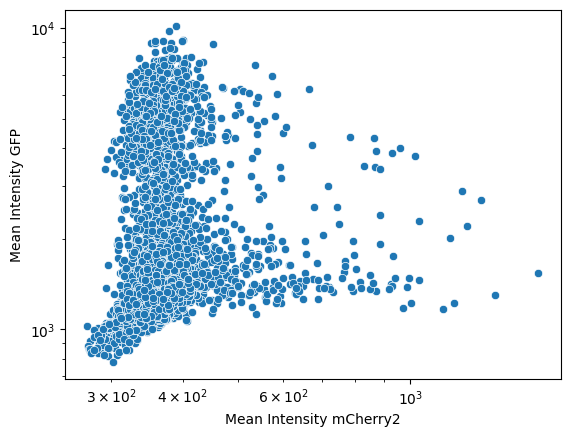

In [21]:
sns.scatterplot(x="Mean Intensity mCherry2", y="Mean Intensity GFP", palette=ingeo_colours, data=NK_data).set(yscale='log',xscale='log')


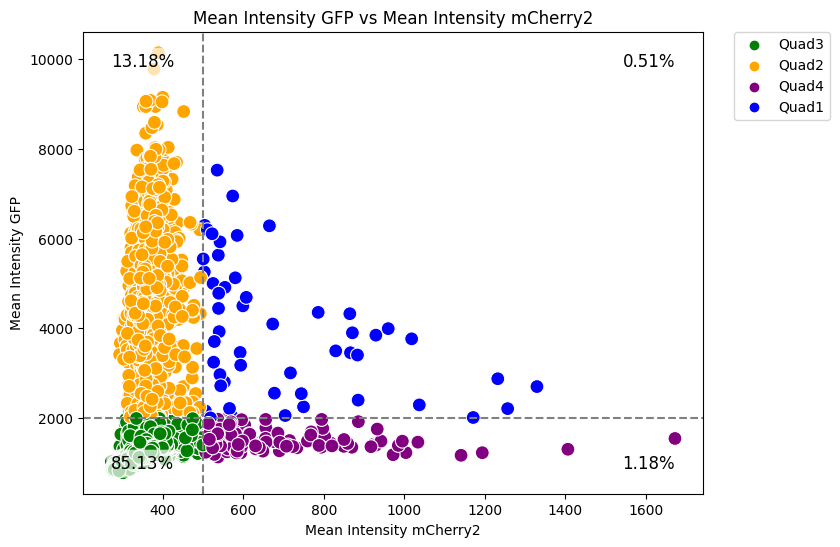

In [30]:
scatter_plot_with_quadrants(NK_data, "Mean Intensity mCherry2", "Mean Intensity GFP", 
                            x_thresh=500, y_thresh=2000, line_color='grey')